<a href="https://colab.research.google.com/github/goldstarphoenix/Data-Science/blob/master/MNIST_data_91_binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#declaring libraries 

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib as plt

# mount drive
#don't forget to type as gdrive

from google.colab import drive
drive.mount('/content/gdrive')
#importing files from kaggle using the .json file from My Account

from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission
# copying the api as it is from kaggle competition into "! <api> -p<type the path from gdrive>"

!kaggle competitions download -c digit-recognizer -p "/content/gdrive/My Drive/Data Science"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving kaggle.json to kaggle (1).json
kaggle.json
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
#use pandas to read the csv 

train_data=pd.read_csv(r'/content/gdrive/My Drive/Data Science/train.csv')

print("train:",train_data.shape) # train data shape

scale=StandardScaler() #use feature scaling 


train_label=train_data.iloc[:,0] # choosing all the rows and only the first column

train_data=train_data.iloc[:,1:] #choosing all the rows and leaving out the first column alone

#train_data,test_data,train_label,test_label=train_test_split(train_data, train_label, test_size=0.2, random_state=0) # train_test_split 
train_data,test_data,train_label,test_label=train_test_split(train_data, train_label, test_size=1/7.0, random_state=25) # works best for test_size=0.4
df1=pd.DataFrame(data=test_label) #converting list to dataframe


train_5=(train_label==5) # true for all 5s and false for the rest
test_5=(test_label==5) 

array=np.asarray(test_data) # converting to an array to convert test_data to data frame 
test=array.reshape(-1,1) # this line to prevent an error in printing its shape



#scale and fit-transforming the data
#train=np.asarray(train_5)
#test=np.asarray(test_5)
#train_scaled=scale.fit_transform(train)
#test_scaled=scale.fit_transform(test)
print(train_5.shape)

print(test_5.shape)


train: (42000, 785)
(36000,)
(6000,)


In [23]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42) # clf stands for classifier 
                                         #better to use a random state when using sgd classifier
  
sgd_clf.fit(train_data, train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

TypeError: ignored

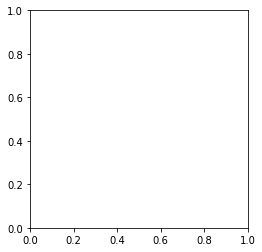

In [28]:
prediction=sgd_clf.predict(test_data)
import matplotlib.pyplot as mpl  
mpl.imshow(prediction[0], cmap = plt.cm.binary,interpolation="nearest")
mpl.show()

In [30]:
from sklearn.metrics import accuracy_score

score =accuracy_score(test_5,prediction)
print(score)

0.9063333333333333
